# Integrating Accelerometer Data
In the last lesson, I gave you code for a `get_derivative_from_data` function and then later asked you to implement it yourself. We'll be doing something similar for `get_integral_from_data` here.

----

## Part 1 - Refamiliarize x(t) --> v(t) --> a(t)
First, refamiliarize yourself with what you did last lesson

In [1]:
from helpers import process_data, get_derivative_from_data
from matplotlib import pyplot as plt

PARALLEL_PARK_DATA = process_data("parallel_park.pickle")

TIMESTAMPS    = [row[0] for row in PARALLEL_PARK_DATA]
DISPLACEMENTS = [row[1] for row in PARALLEL_PARK_DATA]
YAW_RATES     = [row[2] for row in PARALLEL_PARK_DATA]
ACCELERATIONS = [row[3] for row in PARALLEL_PARK_DATA]

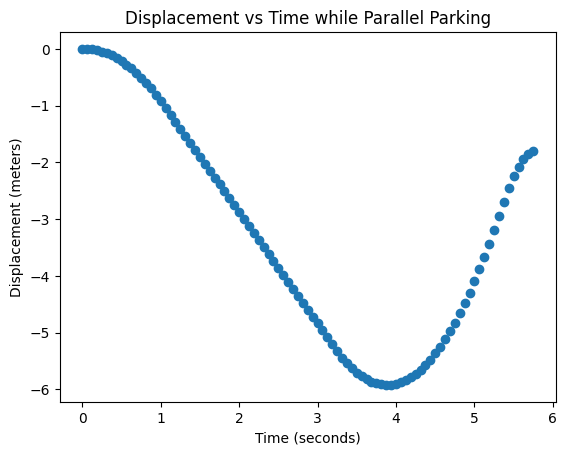

In [2]:
# You saw this plot of displacement versus time.

plt.title("Displacement vs Time while Parallel Parking")
plt.xlabel("Time (seconds)")
plt.ylabel("Displacement (meters)")
plt.scatter(TIMESTAMPS, DISPLACEMENTS)
plt.show()

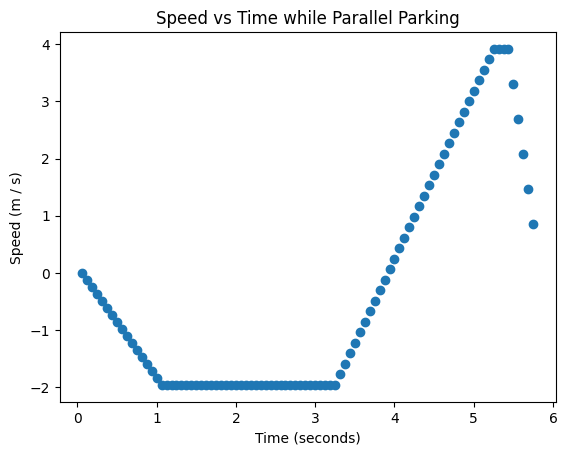

In [3]:
# and you saw how you could differentiate this data
# to get velocity vs time

speeds = get_derivative_from_data(DISPLACEMENTS, TIMESTAMPS)

plt.title("Speed vs Time while Parallel Parking")
plt.xlabel("Time (seconds)")
plt.ylabel("Speed (m / s)")
plt.scatter(TIMESTAMPS[1:], speeds)
plt.show()

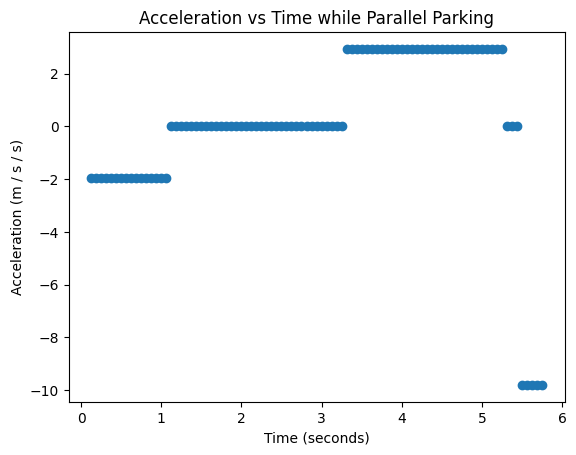

In [4]:
# AND you saw how you could differentiate velocity data
# to get acceleration data...

accels = get_derivative_from_data(speeds, TIMESTAMPS[1:])

plt.title("Acceleration vs Time while Parallel Parking")
plt.xlabel("Time (seconds)")
plt.ylabel("Acceleration (m / s / s)")
plt.scatter(TIMESTAMPS[2:], accels)
plt.show()

## Part 2 - The Other Way: a(t) --> v(t) --> x(t)
Now we're going to use the integral to go from acceleration data back to position data. First, let's plot the raw accelerometer data and compare it to the graph immediately above this cell.

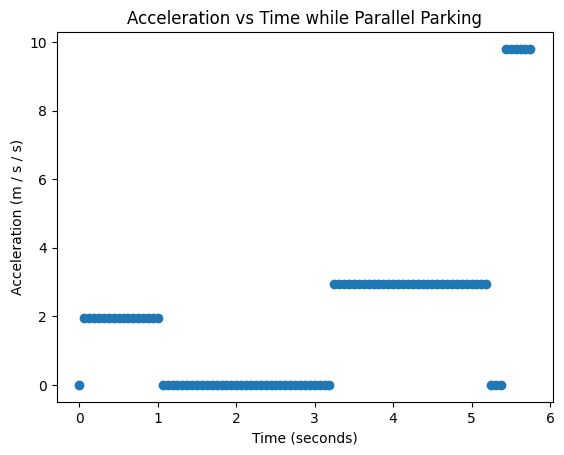

In [5]:
plt.title("Acceleration vs Time while Parallel Parking")
plt.xlabel("Time (seconds)")
plt.ylabel("Acceleration (m / s / s)")
plt.scatter(TIMESTAMPS, ACCELERATIONS)
plt.show()

As you can see they look pretty much identical... there is some missing data though that got lost in the differentiation step right near the beginning of this time window. 

Now I'm going to show you a `get_integral_from_data` function. Read through the code and try to understand it because in a later notebook you will be asked to implement it yourself (without looking back here if possible).

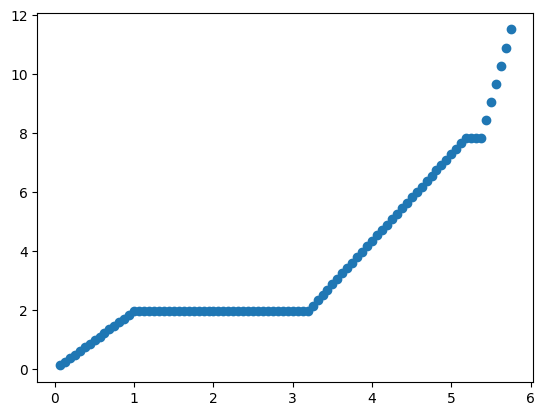

In [6]:
def get_integral_from_data(acceleration_data, times):
    # 1. We will need to keep track of the total accumulated speed
    accumulated_speed = 0.0
    
    # 2. The next lines should look familiar from the derivative code
    last_time = times[0]
    speeds = []
    
    # 3. Once again, we lose some data because we have to start
    #    at i=1 instead of i=0.
    for i in range(1, len(times)):
        
        # 4. Get the numbers for this index i
        acceleration = acceleration_data[i]
        time = times[i]
        
        # 5. Calculate delta t
        delta_t = time - last_time
        
        # 6. This is an important step! This is where we approximate
        #    the area under the curve using a rectangle w/ width of
        #    delta_t.
        delta_v = acceleration * delta_t
        
        # 7. The actual speed now is whatever the speed was before
        #    plus the new change in speed.
        accumulated_speed += delta_v
        
        # 8. append to speeds and update last_time
        speeds.append(accumulated_speed)
        last_time = time
    return speeds

# 9. Now we use the function we just defined
integrated_speeds = get_integral_from_data(ACCELERATIONS, TIMESTAMPS)

# 10. Plot
plt.scatter(TIMESTAMPS[1:], integrated_speeds)
plt.show()

Does that graph look familiar? Scroll up and compare this to the graph that came from **differentiating** position vs time. How similar does it look to the graph we JUST made by **integrating** acceleration vs time?

#### Code walkthrough

**1 -** We're going to be summing up the area of lots of little rectangles. Each of those little rectangles will contribute to the total accumulated area (which represents speed when integrating acceleration data).

**2 - 5 -** These should look familiar. You saw similar code in the `get_derivative_from_data` function

**6 -** This $\Delta v$ is the little bit of area in whatever rectangle we are calculating in this iteration of the loop.

**7 -** We add this $\Delta v$ to the total accumulated velocity.

**8 - 10 -** This should look familiar

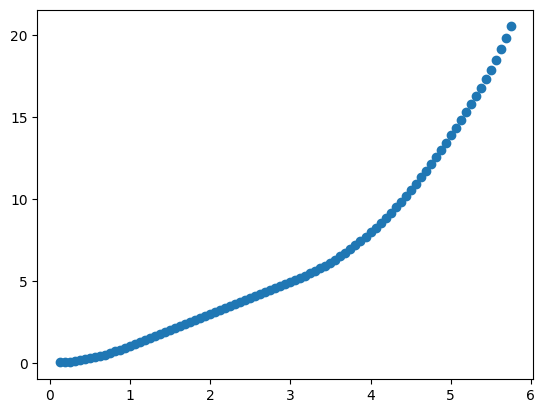

In [7]:
# Integrate AGAIN! Let's see what happens when we integrate 
# again to get displacement data...

integrated_displacements = get_integral_from_data(integrated_speeds, 
                                                 TIMESTAMPS[1:])
plt.scatter(TIMESTAMPS[2:], integrated_displacements)
plt.show()

## What to Remember

Once again, don't try to memorize this code! The key thing to remember is this:

> An integral accumulates change by calculating the area of lots of little rectangles and summing them up.